In [225]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

In [226]:
# Define the initial point 'x' and bounds for each parameter.

x = np.array([1.05, 3.15, 4.43, 7.87])
bounds = [[0.125, 5], [0.125, 5], [0.1, 10], [0.1, 10]]

In [227]:
# Initialize random seed for reproducibility.

np.random.seed(100)

In [228]:
# Define the objective function 'f' and its counter for tracking function evaluations.
#Objective Function

def f(x):
    f.counter += 1 #Increment Counter
    return  1.10471*(x[0]**2)*x[1] + 0.04811*(x[2])*x[3]*(14.0 + x[1])
f.counter = 0

In [229]:
# Define stress-related functions, including 'tau_prime,' 'tau_pprime,' 'tau,' 'σ,' and 'Pc.'
# These functions are used to calculate stress-related terms in the problem.
#Stress Terms  

def tau_prime(x):
    return 6000 / (np.sqrt(2) * x[0] * x[1])

def tau_pprime(x):
    # Calculate tau double prime based on specified formulas.
    upperleft = 6000 * (14 + 0.5 * x[1])
    upperright = np.sqrt(0.25*((x[1]**2)+(x[0]+x[2])**2))
    lower = 2*(0.707*x[0]*x[1]*(((x[1]**2)/12)+(0.25)*(x[0]+x[2])**2))
    return upperleft * upperright / lower

def tau(x):
    # Calculate tau based on specified formulas
    return np.sqrt((tau_prime(x)**2) + (tau_pprime(x)**2) + (x[1] * tau_prime(x) * tau_pprime(x)) / np.sqrt(0.25 * ((x[1]**2) + (x[0] + x[2])**2)))

def σ(x) :
    # Calculate stress based on specified formula.
    return 504000/((x[2]**2)*x[3])
        
def Pc(x) :
    # Calculate stress based on specified formula.
    return 64746.022*((1-0.0282346*x[2])*x[2]*x[3]**3)


In [230]:
# Define constraint functions 'g1,' 'g2,' 'g3,' and 'g4' with counters for tracking function evaluations.
# Constraint Functions

def g1(x) :
    g1.counter += 1 #Increment Counter
    return 13600 - tau(x)
g1.counter = 0

def g2(x) :
    g2.counter += 1 #Increment Counter
    return 30000 - σ(x)
g2.counter = 0

def g3(x) :
    g3.counter += 1 #Increment Counter
    return x[3] - x[0]
g3.counter = 0 

def g4(x) :
    g4.counter += 1 #Increment Counter
    return Pc(x) - 6000
g4.counter = 0 



In [231]:
# Calculate and print the output of the objective function and constraint functions.

print("Objective function output",f(x))
print("First constraint output",g1(x))
print("Second constraint output",g2(x))
print("Third constraint output",g3(x))
print("Fourth constraint output",g4(x))

Objective function output 32.6024179859
First constraint output 5308.848564674312
Second constraint output 26736.764990548952
Third constraint output 6.82
Fourth constraint output 122317448.61430933


In [232]:
# Define a random search function.

def randomsearch (max_evaluations) :
    xbest = [np.random.uniform(bound[0], bound[1]) for bound in bounds]
    ybest = f(xbest)
    
    for i in range(max_evaluations) :
        x = [np.random.uniform(bound[0], bound[1]) for bound in bounds]
        if g1(x) >= 0:
            if g2(x) >= 0:
                if g3(x) >= 0:
                    if g4(x) >= 0:
                        y = f(x)
                        if y < ybest :
                            xbest = x 
                            ybest = y
        return xbest,ybest
        


In [233]:
# Define a simulated annealing function.

def simulatedannealing(max_evaluations,Tk) :
    # Initialize starting point and covariance matrix.
    xbest = [np.random.uniform(bound[0], bound[1]) for bound in bounds]
    ybest = f(xbest)
    Xc = xbest
    Yc = ybest
    sigmas = [(bound[1] - bound[0]) * 0.1 for bound in bounds]
    covariance_matrix = np.diag(sigmas)
    
    for k in range (1,max_evaluations,Tk) :
        xdash = x_prime = np.random.multivariate_normal(Xc, covariance_matrix)
        ydash = f(xdash)
        deltay = ydash - Yc
        if g1(x) >= 0:
             if g2(x) >= 0:
                 if g3(x) >= 0:
                     if g4(x) >= 0:
                        if deltay <= 0 or np.random.uniform(0,1) < min(math.exp(-deltay/Tk),1) :
                             Xc,Yc = xdash,ydash
                             if ydash < ybest :
                                 xbest,ybest = xdash,ydash       
        return xbest,ybest


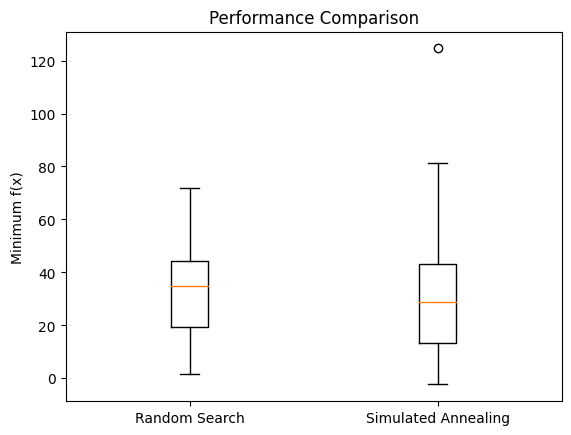

In [236]:
# Initialize lists to store results of multiple repetitions.
random_search_results = []
simulated_annealing_results = []
max_evaluations = 10000
repetitions = 21
Tk = 100


# Perform multiple repetitions of Random Search and Simulated Annealing.
for i in range(1,repetitions) :
    # Random Search
    xbest, ybest = randomsearch(max_evaluations)
    random_search_results.append(ybest)

    # Simulated Annealing
    xbest, ybest = simulatedannealing(max_evaluations,Tk)
    simulated_annealing_results.append(ybest)

# Create a box plot to visualize the performance comparison.    
data = [random_search_results, simulated_annealing_results]
labels = ['Random Search', 'Simulated Annealing']
plt.boxplot(data, labels=labels)
plt.ylabel('Minimum f(x)')
plt.title('Performance Comparison')

 
# Display the box plot.
plt.show()   



In [235]:
print("Number of time  f(x) function used",f.counter)
print("Number of time  g1(x) function used",g1.counter)
print("Number of time  g2(x) function used",g2.counter)
print("Number of time  g3(x) function used",g3.counter)
print("Number of time  g4(x) function used",g4.counter)

Number of time  f(x) function used 75
Number of time  g1(x) function used 41
Number of time  g2(x) function used 38
Number of time  g3(x) function used 37
Number of time  g4(x) function used 35


In [217]:
# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(random_search_results, simulated_annealing_results)

# Set the significance level (alpha)
alpha = 0.05

# Check the p-value against the significance level
if p_value < alpha:
    print("The Mann-Whitney U test indicates a significant difference between the methods.")
else:
    print("No significant difference between the methods based on the Mann-Whitney U test.")

# Print the results
print("Mann-Whitney U Statistic:", statistic)
print("P-Value:", p_value)

No significant difference between the methods based on the Mann-Whitney U test.
Mann-Whitney U Statistic: 130.0
P-Value: 0.06011064176288863
